# *Sample survey of American ratio of family income to poverty guidelines*

**Course:** *STAT 344 2024W1*


### Group Members

| **Name**          | **Student Number** | **Role**          | **Role**                                                                 |
|-------------------|---------------------|-------------------|------------------------------------------------------------------------------------|
| **Yanping(Dedoria) Wang** | 89845473            | Group Leader      | - Coordinated meetings and managed project timeline.  |
| **Shuyang Geng**     | 15780521            | Data Analyst      | - Conducted statistical analyses. |

### Contributions

Dedoria served as the **Group Leader**, responsible for:

- **Project Coordination:** Organized and led regular team meetings to ensure that project were on the right track.
- **Data Oversight:** Oversaw the data analysis process to ensure accuracy and consistency in results.
- **Conclusion:** Wrap everything from the project write descriptions and results.

Shuyang served as the **Data Analyst**, responsible for:
- **Statistical Analysis:** Performed various statistical tests and analyses to interpret the data.
- **Data Visualization:** Created informative and visually appealing graphs and charts using ggplot2 to represent data findings.

# Objective and Motivation:
Our data set is [NHANES](https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&Cycle=2017-2020)


### Why this data set?
1. This data set provides a rich dataset for studying the interplay between socioeconomic factors, like the individual income-to-poverty ratio, and health outcomes.

2. The NHANES dataset is designed to be nationally representative, covering diverse populations across the U.S. It over-samples certain groups (e.g., individuals aged 60 and older, African Americans, and Hispanics) to ensure reliable statistics for these subpopulations. 

**The dataset includes a range of variables that are commonly used for stratification, such as:**

Demographics (age, gender, race/ethnicity)
Socioeconomic status (family income, poverty guidelines)

## Objective:
The objective of this sample survey is to help us understand the economical status distribution of the American. Taking both SRS and stratified samples provides a sanpshot of whole population, identifying the families living below or above the poverty line. It also has further significance as it might support govermental decision making and provide insights to address economic inequality. Also gives us a sight of what variable is most related to the family income. What characteristic makes US families have a higher family income. 



### Imports:

In [29]:
library(dplyr)
require(SASxport)
library(foreign)
library(ggplot2)
library(tidyr)
nhanes_data <- read.xport("data/P_DEMO.XPT")



要求されたパッケージ SASxport をロード中です

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“‘SASxport’ という名前のパッケージはありません”


In [2]:
head(nhanes_data)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,⋯,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,109263,66,2,1,2,NA,5,6,2,1,⋯,2,NA,NA,NA,NA,7891.762,8951.816,3,156,4.66
2,109264,66,2,2,13,NA,1,1,2,1,⋯,2,1,2,2,1,11689.747,12271.157,1,155,0.83
3,109265,66,2,1,2,NA,3,3,2,1,⋯,2,NA,NA,NA,NA,16273.826,16658.764,1,157,3.06
4,109266,66,2,2,29,NA,5,6,2,2,⋯,2,1,2,2,1,7825.646,8154.968,2,168,5.00
5,109267,66,1,2,21,NA,2,2,NA,2,⋯,2,NA,NA,NA,NA,26379.992,0.000,1,156,5.00
6,109268,66,1,2,18,NA,3,3,NA,1,⋯,2,NA,NA,NA,NA,19639.221,0.000,1,155,1.66


### **Selection and Evaluation of Predictor Variables**

In this phase, we systematically select predictor variables based on theoretical relevance and intuitive. Our approach involves the following steps:

1. **Variable Selection**
   - **Intuitive Selection:** Initially, predictor variables are chosen based on domain knowledge and our considerations of their relevance to the Y variable.

2. **Sampling Methods**
   - **Simple Random Sampling (SRS):** We employ SRS to create unbiased samples from the population, ensuring each observation has an equal probability of being selected.
   - **Stratified Sampling:** To enhance the representativeness of our samples, especially when the population comprises distinct subgroups, we use stratified sampling. This method involves dividing the population into homogeneous strata and sampling proportionally from each stratum. 
   ### ***<span style="color:blue"> Use optimal allocation assuming the cost of collecting data in different strata are the same, and proportional allocation to test which of those three method is the best choice.</span>***

3. **Model Testing and Evaluation**
   - **Comparative Analysis:** Each selected predictor variable is tested against the response variable using both SRS and stratified sampling methods (to determine different stratas).
   - **Performance Metrics:** We evaluate the performance of each sampling method by analyzing key statistical metrics, including the **standard error** and the **confidence interval** of the estimates.

4. **Method and Variable Optimization**
   - **Best Sampling Method Identification:** By comparing the performance metrics, we identify which sampling method (SRS or stratified) provides more reliable and precise estimates.
   - **Optimal Predictor Variable Selection:** Within the chosen sampling method, we select the predictor variable that demonstrates the smallest standard error and the narrowest confidence interval which included the true population mean, indicating higher precision and reliability in the estimates.





## variable choices:

| **variable Name**          | **Description** | **type of variable**          | 
|-------------------|---------------------|-------------------|
| **INDFMPIR**     |A ratio of income to poverty guidelines.             | Y variable our aim to discover (Continuous)      | 
| **DMDEDUC2** | The highest grade or level of school completed or the highest degree received.     | Predictor (Categorical)      | 
| **RIAGENDR**     | Gender of the participant.            | Male or female (Categorical)       |
| **RIDAGEYR**     | Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.     | 20 - 80 (change to binary, at a threshol of 66 which is the full retirement age in US )      | 


### A glance at the variable y we choose(Values at or above 5.00 are coded as 5.00 due to disclosure concerns):

In [16]:
#summary(DEMO)
summary(nhanes_data$INDFMPIR)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.020   1.960   2.406   3.880   5.000    2201 

In [ ]:
nhanes_clean <- nhanes_data %>%
  select(INDFMPIR, DMDEDUC2, RIAGENDR, RIDAGEYR)

nhanes_clean <- nhanes_clean %>%
  drop_na()

summary(nhanes_clean)
nrow(nhanes_clean)

    INDFMPIR        DMDEDUC2        RIAGENDR        RIDAGEYR    
 Min.   :0.000   Min.   :1.000   Min.   :1.000   Min.   :20.00  
 1st Qu.:1.190   1st Qu.:3.000   1st Qu.:1.000   1st Qu.:36.00  
 Median :2.210   Median :4.000   Median :2.000   Median :52.00  
 Mean   :2.598   Mean   :3.591   Mean   :1.516   Mean   :51.08  
 3rd Qu.:4.202   3rd Qu.:5.000   3rd Qu.:2.000   3rd Qu.:65.00  
 Max.   :5.000   Max.   :9.000   Max.   :2.000   Max.   :80.00  

[1] 7828

In [42]:
# True mean

mean(nhanes_clean$INDFMPIR)

[1] 2.597786

Visualization using box plot of income ratio:
Median is 1.96



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.020   1.960   2.406   3.880   5.000    2201 

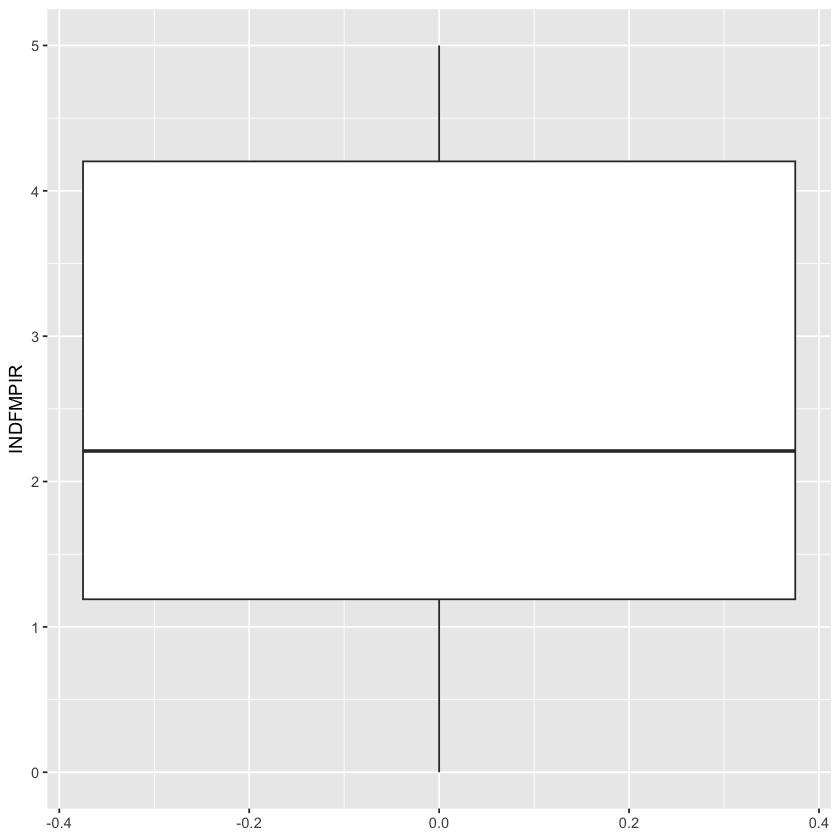

In [ ]:
income_ratio_box_plot <- nhanes_clean %>% ggplot() +
    geom_boxplot(aes(y = INDFMPIR))
    
income_ratio_box_plot

summary(nhanes_data$INDFMPIR)    


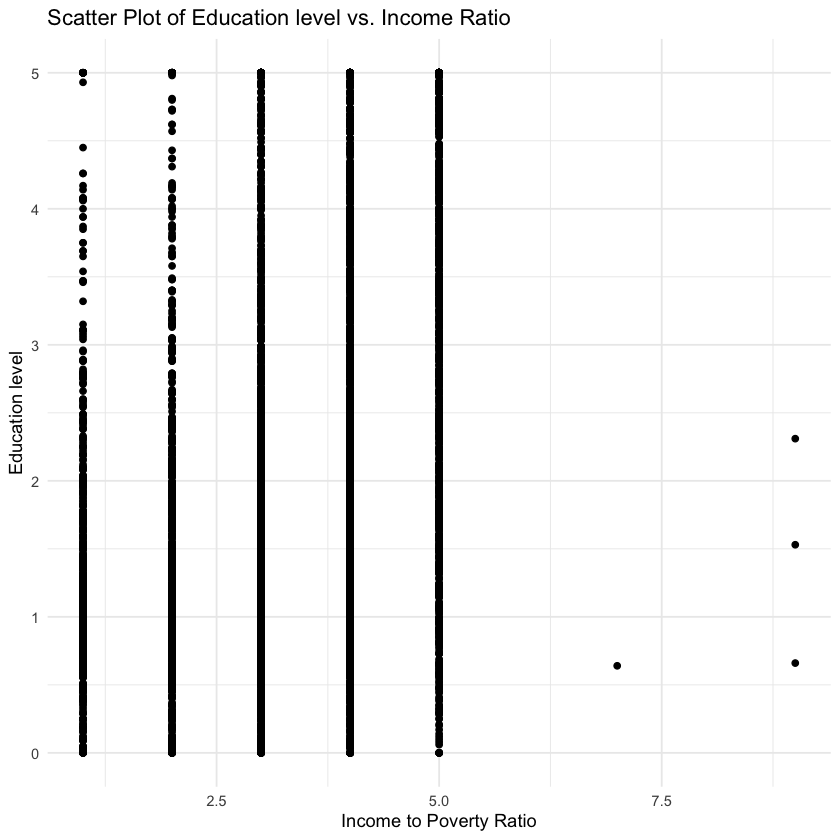

In [34]:
ggplot(nhanes_clean, aes(x = DMDEDUC2, y = INDFMPIR)) +
  geom_point() +
  labs(
    title = "Scatter Plot of Education level vs. Income Ratio",
    x = "Income to Poverty Ratio",
    y = "Education level"
  ) +
  theme_minimal()

The scatter plot reveals that individuals with lower education levels experience a less pronounced decline in income compared to those with higher education levels. This suggests that higher education may be associated with greater income variability.

## Simple random sample

In [ ]:
# set seed for aim of replication 
sum_student_no <- 89845473 + 15780521
set.seed(sum_student_no)

n <- 700
N <- nrow(nhanes_clean)

srs <- sample_n(nhanes_clean,n)

In [ ]:
# FPC

fpc <- (1 - n / N)


### Mean, standard error and confidence interval

In [41]:
#mean
SRS_mean <- mean(srs$INDFMPIR)

#standard error
SRS_se <- sqrt(fpc)*sd(srs$INDFMPIR)/sqrt(n)

#confidence interval
SRS_CI <- SRS_mean + qt(0.95,n)*c(-1,1)*SRS_se

cat("The mean for SRS income ratio is ", SRS_mean, ", the se for it is ", SRS_se, 
    "\nThe 95% Confidence Interval for that is ", SRS_CI[1], " and ", SRS_CI[2])
     


The mean for SRS income ratio is  2.648771 , the se for it is  0.0598339 
The 95% Confidence Interval for that is  2.550223  and  2.74732